## Introdução à manipulação de dataframes

#### 1. Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error

c:\Users\alice\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\alice\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


#### 2. Exemplo de tipos de dados

In [2]:
#Cria dataframe
df = pd.DataFrame({
    "A": 3,
    "B": pd.Timestamp("20240101"),
    "C": pd.Series(2, index=list(range(4)), dtype="float32"),
    "D": np.array([5]*4, dtype="int32"),
    "E": pd.Categorical(["train", "test", "test", "train"]),
    "F": "foo"
})

#Exibe tabela completa
df

,A,B,C,D,E,F
0,3,2024-01-01,2.0,5,train,foo
1,3,2024-01-01,2.0,5,test,foo
2,3,2024-01-01,2.0,5,test,foo
3,3,2024-01-01,2.0,5,train,foo


In [3]:
#Conjunto de dados iris
from sklearn.datasets import load_iris 
iris = load_iris() 
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### 3. Renomear colunas

In [4]:
# Criar DataFrame com colunas renomeadas
df = pd.DataFrame(
    iris.data,
    columns=['comprim_sepala', 'largura_sepala', 'comprim_petala', 'largura_petala']
)

# Adicionar a coluna da classe (nome da espécie)
df['classe'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Mostrar as primeiras linhas
df.head()

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 4. Localizar o conteúdo de uma ou mais linhas específicas

In [5]:
#Para observar apenas a linha, usamos iloc com o índice da linha que queremos ver:
df.iloc[0]

comprim_sepala       5.1
largura_sepala       3.5
comprim_petala       1.4
largura_petala       0.2
classe            setosa
Name: 0, dtype: object

In [6]:
#ou em forma de lista para ver mais de uma linha específica
indices_lista = [0,80,110]
df.iloc[indices_lista]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,setosa
80,5.5,2.4,3.8,1.1,versicolor
110,6.5,3.2,5.1,2.0,virginica


#### 5. Visualizar dados de uma coluna específica

In [7]:
df['comprim_petala']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: comprim_petala, Length: 150, dtype: float64

In [8]:
# ou ainda, combinando o filtro de linhas e colunas 
df['comprim_petala'].iloc[50]

4.7

#### 6. Obter informações sobre os dados do dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   comprim_sepala  150 non-null    float64 
 1   largura_sepala  150 non-null    float64 
 2   comprim_petala  150 non-null    float64 
 3   largura_petala  150 non-null    float64 
 4   classe          150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [10]:
df.shape

(150, 5)

In [11]:
#ver apenas algumas colunas 
df[['largura_sepala', 'largura_petala']]

,largura_sepala,largura_petala
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


In [12]:
#ver valores distintos para uma coluna
df['classe'].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

#### 7. Visualizações

<AxesSubplot:>

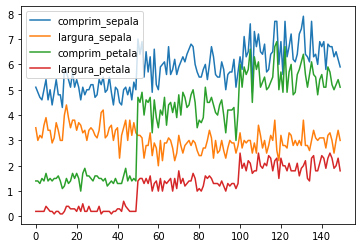

In [13]:
df.plot()

<AxesSubplot:>

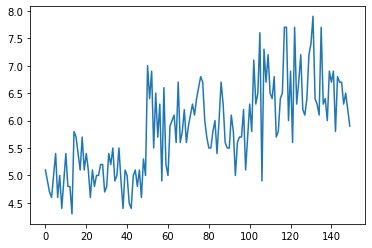

In [14]:
df['comprim_sepala'].plot()

<AxesSubplot:ylabel='Frequency'>

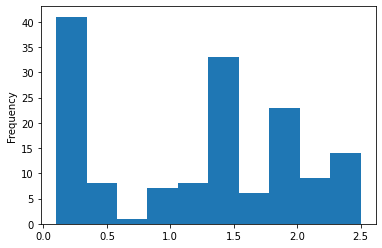

In [15]:
df['largura_petala'].plot(kind='hist')

#### 8. Filtrar linhas com base em valores de interesse

In [16]:
df[df['largura_petala'] == 1.1]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
69,5.6,2.5,3.9,1.1,versicolor
80,5.5,2.4,3.8,1.1,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [17]:
df.query('largura_petala == 1.1')

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
69,5.6,2.5,3.9,1.1,versicolor
80,5.5,2.4,3.8,1.1,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [18]:
df[(df['largura_petala'] > 1.1) & (df['largura_petala'] < 1.4)]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
53,5.5,2.3,4.0,1.3,versicolor
55,5.7,2.8,4.5,1.3,versicolor
58,6.6,2.9,4.6,1.3,versicolor
64,5.6,2.9,3.6,1.3,versicolor
71,6.1,2.8,4.0,1.3,versicolor
73,6.1,2.8,4.7,1.2,versicolor
74,6.4,2.9,4.3,1.3,versicolor
82,5.8,2.7,3.9,1.2,versicolor
87,6.3,2.3,4.4,1.3,versicolor
88,5.6,3.0,4.1,1.3,versicolor


#### 9. Métricas estatísticas

In [19]:
#Calcula métricas estatísticas para cada coluna do df
df.describe()

,comprim_sepala,largura_sepala,comprim_petala,largura_petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

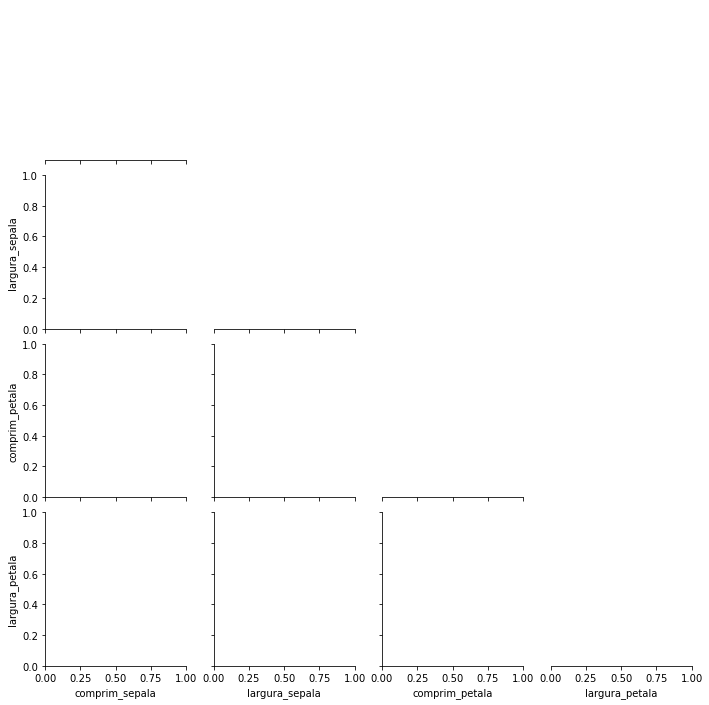

In [20]:
#Exibe features comparadas duas a duas
sns.pairplot(df, hue='classe', markers=['o','s','D'], corner=True)
